Goal for this notebook is to scrape the Billboard Hot 100 for each week in 2019, use Spotify/Spotipy to filter for songs that were released in 2019, and reduce the entries to a single entry for each track containing:

##### from Billboard
* Track name, artist
* Peak position
* Total weeks on chart
* Artist count / collab

##### from Spotify
* Release date
* Duration
* Popularity score
* Audio features (danceability, energy, loudness, mode, speechiness, acousticness, valence, tempo)



In [76]:
import pandas as pd
import numpy as np
import seaborn as sns
import datetime as dt
from IPython.core.display import display, HTML
from bs4 import BeautifulSoup
import requests
from hot100scraper import hot100scraper
import matplotlib.pyplot as plt

For reference, Billboard urls are formatted as follows: https://www.billboard.com/charts/hot-100/2019-01-12

Notes:
* Week runs Sunday to Saturday
* Date of week is from the final day, Saturday
* First week of 2019 ended Jan 12
* Final week ended Dec 28

In [2]:
date = dt.datetime(2019,1,12)
date_list = []
while date.year < 2020:
    date_list.append(date)
    date += dt.timedelta(days=7)
    
date_list #Now we have a list of every chart date for 2019

[datetime.datetime(2019, 1, 12, 0, 0),
 datetime.datetime(2019, 1, 19, 0, 0),
 datetime.datetime(2019, 1, 26, 0, 0),
 datetime.datetime(2019, 2, 2, 0, 0),
 datetime.datetime(2019, 2, 9, 0, 0),
 datetime.datetime(2019, 2, 16, 0, 0),
 datetime.datetime(2019, 2, 23, 0, 0),
 datetime.datetime(2019, 3, 2, 0, 0),
 datetime.datetime(2019, 3, 9, 0, 0),
 datetime.datetime(2019, 3, 16, 0, 0),
 datetime.datetime(2019, 3, 23, 0, 0),
 datetime.datetime(2019, 3, 30, 0, 0),
 datetime.datetime(2019, 4, 6, 0, 0),
 datetime.datetime(2019, 4, 13, 0, 0),
 datetime.datetime(2019, 4, 20, 0, 0),
 datetime.datetime(2019, 4, 27, 0, 0),
 datetime.datetime(2019, 5, 4, 0, 0),
 datetime.datetime(2019, 5, 11, 0, 0),
 datetime.datetime(2019, 5, 18, 0, 0),
 datetime.datetime(2019, 5, 25, 0, 0),
 datetime.datetime(2019, 6, 1, 0, 0),
 datetime.datetime(2019, 6, 8, 0, 0),
 datetime.datetime(2019, 6, 15, 0, 0),
 datetime.datetime(2019, 6, 22, 0, 0),
 datetime.datetime(2019, 6, 29, 0, 0),
 datetime.datetime(2019, 7, 6, 0,

Let's make a variable that we can put into this url

In [3]:
date_tester = date_list[0]

In [4]:
f'https://www.billboard.com/charts/hot-100/{date_tester.strftime("%Y-%m-%d")}'

'https://www.billboard.com/charts/hot-100/2019-01-12'

Score!  Now lets get our datasets.

In [5]:
df_list = []

for date in date_list:
    try:
        billboard_url = f'https://www.billboard.com/charts/hot-100/{date.strftime("%Y-%m-%d")}'
        hot100 = hot100scraper(billboard_url) #returns dictionary of each song
        print(f'parsing week of {date}')
        df_list.append(pd.DataFrame.from_dict(hot100,orient='index')) #adds dictionary to list
    except:
        print(f'error week {date}')

hot_100_2019_raw = pd.concat(df_list).reset_index(drop=True) #creates new dataframe of inline info on each track


parsing week of 2019-01-12 00:00:00
parsing week of 2019-01-19 00:00:00
parsing week of 2019-01-26 00:00:00
parsing week of 2019-02-02 00:00:00
parsing week of 2019-02-09 00:00:00
parsing week of 2019-02-16 00:00:00
parsing week of 2019-02-23 00:00:00
parsing week of 2019-03-02 00:00:00
parsing week of 2019-03-09 00:00:00
parsing week of 2019-03-16 00:00:00
parsing week of 2019-03-23 00:00:00
parsing week of 2019-03-30 00:00:00
parsing week of 2019-04-06 00:00:00
parsing week of 2019-04-13 00:00:00
parsing week of 2019-04-20 00:00:00
parsing week of 2019-04-27 00:00:00
parsing week of 2019-05-04 00:00:00
parsing week of 2019-05-11 00:00:00
parsing week of 2019-05-18 00:00:00
parsing week of 2019-05-25 00:00:00
parsing week of 2019-06-01 00:00:00
parsing week of 2019-06-08 00:00:00
parsing week of 2019-06-15 00:00:00
parsing week of 2019-06-22 00:00:00
parsing week of 2019-06-29 00:00:00
parsing week of 2019-07-06 00:00:00
parsing week of 2019-07-13 00:00:00
parsing week of 2019-07-20 0

In [6]:
hot_100_2019_raw

,Rank,Song_title,Artist,Rank_change,Last_week,Peak_rank,Weeks_on_chart,Chart_week,Artist_list,Artist_count,Collab,Artist_query,Song_and_artist
0,1,Without Me,Halsey,+1,2,1,13,2019-01-12,[Halsey],1,False,Halsey,Without Me Halsey
1,2,"Thank U, Next",Ariana Grande,-1,1,1,9,2019-01-12,[Ariana Grande],1,False,Ariana Grande,"Thank U, Next Ariana Grande"
2,3,Sunflower (Spider-Man: Into The Spider-Verse),Post Malone & Swae Lee,+2,5,3,11,2019-01-12,"[Post Malone, Swae Lee]",2,True,Post Malone Swae Lee,Sunflower (Spider-Man: Into The Spider-Verse) ...
3,4,Sicko Mode,Travis Scott,-,4,1,22,2019-01-12,[Travis Scott],1,False,Travis Scott,Sicko Mode Travis Scott
4,5,High Hopes,Panic! At The Disco,+1,6,5,22,2019-01-12,[Panic! At The Disco],1,False,Panic! At The Disco,High Hopes Panic! At The Disco
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5095,96,Homesick,Kane Brown,-6,90,88,5,2019-12-28,[Kane Brown],1,False,Kane Brown,Homesick Kane Brown
5096,97,Easy,DaniLeigh Featuring Chris Brown,-8,89,88,7,2019-12-28,"[DaniLeigh, Chris Brown]",2,True,DaniLeigh Chris Brown,Easy DaniLeigh Featuring Chris Brown
5097,98,Enemies,Post Malone Featuring DaBaby,-15,83,16,15,2019-12-28,"[Post Malone, DaBaby]",2,True,Post Malone DaBaby,Enemies Post Malone Featuring DaBaby
5098,99,She,Harry Styles,-,-,99,1,2019-12-28,[Harry Styles],1,False,Harry Styles,She Harry Styles


In [7]:
hot_100_2019_raw.to_csv('hot_100_2019_raw.csv')

Let's now start building a dataframe of a single entry for each track.  Because ranks are scaled in the opposite direction of other metrics, we'll have to join a few different reorganizations of this chart.

In [16]:
#hot_100_2019_raw = pd.read_csv('hot_100_2019_raw.csv')

In [11]:
hot_100_2019_tracks = pd.DataFrame(hot_100_2019_raw.groupby('Song_and_artist').Weeks_on_chart.count()).reset_index()
hot_100_2019_tracks

,Song_and_artist,Weeks_on_chart
0,"1, 2 Many Luke Combs & Brooks & Dunn",1
1,"10,000 Hours Dan + Shay & Justin Bieber",11
2,223's YNW Melly & 9lokknine,15
3,24/7 Meek Mill Featuring Ella Mai,16
4,3 Headed Snake Gunna Featuring Young Thug,1
...,...,...
610,everything i wanted Billie Eilish,6
611,homecoming queen? Kelsea Ballerini,3
612,iPHONE DaBaby & Nicki Minaj,1
613,idontwannabeyouanymore Billie Eilish,3


In [12]:
hot_100_2019_tracks['Peak_rank']=[i for i in hot_100_2019_raw.groupby(['Song_and_artist']).Peak_rank.min()]
hot_100_2019_tracks

,Song_and_artist,Weeks_on_chart,Peak_rank
0,"1, 2 Many Luke Combs & Brooks & Dunn",1,97
1,"10,000 Hours Dan + Shay & Justin Bieber",11,4
2,223's YNW Melly & 9lokknine,15,34
3,24/7 Meek Mill Featuring Ella Mai,16,54
4,3 Headed Snake Gunna Featuring Young Thug,1,74
...,...,...,...
610,everything i wanted Billie Eilish,6,8
611,homecoming queen? Kelsea Ballerini,3,82
612,iPHONE DaBaby & Nicki Minaj,1,43
613,idontwannabeyouanymore Billie Eilish,3,96


All the following values should be the same, so we'll pull the first from each group

In [13]:
hot_100_2019_tracks['Song_title']= [i for i in hot_100_2019_raw.groupby(['Song_and_artist']).Song_title.first()]
hot_100_2019_tracks['Artist']= [i for i in hot_100_2019_raw.groupby(['Song_and_artist']).Artist.first()]
hot_100_2019_tracks['Artist_list']= [i for i in hot_100_2019_raw.groupby(['Song_and_artist']).Artist_list.first()]
hot_100_2019_tracks['Artist_count']= [i for i in hot_100_2019_raw.groupby(['Song_and_artist']).Artist_count.first()]
hot_100_2019_tracks['Collab']= [i for i in hot_100_2019_raw.groupby(['Song_and_artist']).Collab.first()]
hot_100_2019_tracks['Artist_query']= [i for i in hot_100_2019_raw.groupby(['Song_and_artist']).Artist_query.first()]

hot_100_2019_tracks=hot_100_2019_tracks[
    ['Song_title','Artist','Weeks_on_chart','Peak_rank',
     'Artist_list','Artist_count','Collab','Artist_query','Song_and_artist']]

hot_100_2019_tracks


,Song_title,Artist,Weeks_on_chart,Peak_rank,Artist_list,Artist_count,Collab,Artist_query,Song_and_artist
0,"1, 2 Many",Luke Combs & Brooks & Dunn,1,97,"[Luke Combs, Brooks, Dunn]",3,True,Luke Combs Brooks,"1, 2 Many Luke Combs & Brooks & Dunn"
1,"10,000 Hours",Dan + Shay & Justin Bieber,11,4,"[Dan + Shay, Justin Bieber]",2,True,Dan + Shay Justin Bieber,"10,000 Hours Dan + Shay & Justin Bieber"
2,223's,YNW Melly & 9lokknine,15,34,"[YNW Melly, 9lokknine]",2,True,YNW Melly 9lokknine,223's YNW Melly & 9lokknine
3,24/7,Meek Mill Featuring Ella Mai,16,54,"[Meek Mill, Ella Mai]",2,True,Meek Mill Ella Mai,24/7 Meek Mill Featuring Ella Mai
4,3 Headed Snake,Gunna Featuring Young Thug,1,74,"[Gunna, Young Thug]",2,True,Gunna Young Thug,3 Headed Snake Gunna Featuring Young Thug
...,...,...,...,...,...,...,...,...,...
610,everything i wanted,Billie Eilish,6,8,[Billie Eilish],1,False,Billie Eilish,everything i wanted Billie Eilish
611,homecoming queen?,Kelsea Ballerini,3,82,[Kelsea Ballerini],1,False,Kelsea Ballerini,homecoming queen? Kelsea Ballerini
612,iPHONE,DaBaby & Nicki Minaj,1,43,"[DaBaby, Nicki Minaj]",2,True,DaBaby Nicki Minaj,iPHONE DaBaby & Nicki Minaj
613,idontwannabeyouanymore,Billie Eilish,3,96,[Billie Eilish],1,False,Billie Eilish,idontwannabeyouanymore Billie Eilish


Looks like we've got 615 individual tracks.  Next, we will query Spotify for the album relase date data so we can make another trim.

In [14]:
import spotipy
import spotipy.util as util
from spotipy.oauth2 import SpotifyClientCredentials
import spotipy.oauth2 as oauth2
import mycredentials

market = [ "AD", "AR", "AT", "AU", "BE", "BG", "BO", "BR", "CA", "CH", "CL", "CO", "CR", "CY", 
      "CZ", "DE", "DK", "DO", "EC", "EE", "ES", "FI", "FR", "GB", "GR", "GT", "HK", "HN", "HU", 
      "ID", "IE", "IS", "IT", "JP", "LI", "LT", "LU", "LV", "MC", "MT", "MX", "MY", "NI", "NL", 
      "NO", "NZ", "PA", "PE", "PH", "PL", "PT", "PY", "SE", "SG", "SK", "SV", "TH", "TR", "TW", 
      "US", "UY", "VN" ]

CLIENT_ID = mycredentials.myclientid
CLIENT_SECRET = mycredentials.mysecret

credentials = oauth2.SpotifyClientCredentials(
        client_id=CLIENT_ID,
        client_secret=CLIENT_SECRET)

token = credentials.get_access_token()
spotify = spotipy.Spotify(auth=token)


In [15]:
query = hot_100_2019_tracks.iloc[0]['Song_title'] + ' ' + hot_100_2019_tracks.iloc[0]['Artist_query']
query

'1, 2 Many Luke Combs Brooks'

In [16]:
result = spotify.search(query, type="track", market=market, limit=1)
result

{'tracks': {'href': 'https://api.spotify.com/v1/search?query=1%2C+2+Many+Luke+Combs+Brooks&type=track&market=AD&offset=0&limit=1',
  'items': [{'album': {'album_type': 'album',
     'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/718COspgdWOnwOFpJHRZHS'},
       'href': 'https://api.spotify.com/v1/artists/718COspgdWOnwOFpJHRZHS',
       'id': '718COspgdWOnwOFpJHRZHS',
       'name': 'Luke Combs',
       'type': 'artist',
       'uri': 'spotify:artist:718COspgdWOnwOFpJHRZHS'}],
     'external_urls': {'spotify': 'https://open.spotify.com/album/1LVNYhjG7hkowdUwgwOdXj'},
     'href': 'https://api.spotify.com/v1/albums/1LVNYhjG7hkowdUwgwOdXj',
     'id': '1LVNYhjG7hkowdUwgwOdXj',
     'images': [{'height': 640,
       'url': 'https://i.scdn.co/image/5c292f62fadd6996a0f3d242eb709d9227d31dfa',
       'width': 640},
      {'height': 300,
       'url': 'https://i.scdn.co/image/214c56684aa69366a90ed44762a7da4303bbaad6',
       'width': 300},
      {'height': 64,
      

In [17]:
feature_dict_list = []
for i in range(len(hot_100_2019_tracks)):
    query = hot_100_2019_tracks.iloc[i]['Song_title'] + ' ' + hot_100_2019_tracks.iloc[i]['Artist_query']
    result = spotify.search(query, type="track", market=market, limit=1)
    feature_dict_list.append(result)
    
hot_100_2019_tracks['Feature_dict'] = feature_dict_list

/Users/andrewway/opt/anaconda3/envs/metis/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [18]:
hot_100_2019_tracks

,Song_title,Artist,Weeks_on_chart,Peak_rank,Artist_list,Artist_count,Collab,Artist_query,Song_and_artist,Feature_dict
0,"1, 2 Many",Luke Combs & Brooks & Dunn,1,97,"[Luke Combs, Brooks, Dunn]",3,True,Luke Combs Brooks,"1, 2 Many Luke Combs & Brooks & Dunn",{'tracks': {'href': 'https://api.spotify.com/v...
1,"10,000 Hours",Dan + Shay & Justin Bieber,11,4,"[Dan + Shay, Justin Bieber]",2,True,Dan + Shay Justin Bieber,"10,000 Hours Dan + Shay & Justin Bieber",{'tracks': {'href': 'https://api.spotify.com/v...
2,223's,YNW Melly & 9lokknine,15,34,"[YNW Melly, 9lokknine]",2,True,YNW Melly 9lokknine,223's YNW Melly & 9lokknine,{'tracks': {'href': 'https://api.spotify.com/v...
3,24/7,Meek Mill Featuring Ella Mai,16,54,"[Meek Mill, Ella Mai]",2,True,Meek Mill Ella Mai,24/7 Meek Mill Featuring Ella Mai,{'tracks': {'href': 'https://api.spotify.com/v...
4,3 Headed Snake,Gunna Featuring Young Thug,1,74,"[Gunna, Young Thug]",2,True,Gunna Young Thug,3 Headed Snake Gunna Featuring Young Thug,{'tracks': {'href': 'https://api.spotify.com/v...
...,...,...,...,...,...,...,...,...,...,...
610,everything i wanted,Billie Eilish,6,8,[Billie Eilish],1,False,Billie Eilish,everything i wanted Billie Eilish,{'tracks': {'href': 'https://api.spotify.com/v...
611,homecoming queen?,Kelsea Ballerini,3,82,[Kelsea Ballerini],1,False,Kelsea Ballerini,homecoming queen? Kelsea Ballerini,{'tracks': {'href': 'https://api.spotify.com/v...
612,iPHONE,DaBaby & Nicki Minaj,1,43,"[DaBaby, Nicki Minaj]",2,True,DaBaby Nicki Minaj,iPHONE DaBaby & Nicki Minaj,{'tracks': {'href': 'https://api.spotify.com/v...
613,idontwannabeyouanymore,Billie Eilish,3,96,[Billie Eilish],1,False,Billie Eilish,idontwannabeyouanymore Billie Eilish,{'tracks': {'href': 'https://api.spotify.com/v...


We've now got the feature dictionary for each track in our dataframe (or at least we hope so).  Once we start exctracting data from it, we'll quickly see which ones need to be rerun.

In [19]:
hot_100_2019_tracks.iloc[16]['Feature_dict']['tracks']
#this entry worked, you can tell because the 'items' section on line 2 has a list of results

{'href': 'https://api.spotify.com/v1/search?query=Afterglow+Taylor+Swift&type=track&market=AD&offset=0&limit=1',
 'items': [{'album': {'album_type': 'album',
    'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/06HL4z0CvFAxyc27GXpf02'},
      'href': 'https://api.spotify.com/v1/artists/06HL4z0CvFAxyc27GXpf02',
      'id': '06HL4z0CvFAxyc27GXpf02',
      'name': 'Taylor Swift',
      'type': 'artist',
      'uri': 'spotify:artist:06HL4z0CvFAxyc27GXpf02'}],
    'external_urls': {'spotify': 'https://open.spotify.com/album/1NAmidJlEaVgA3MpcPFYGq'},
    'href': 'https://api.spotify.com/v1/albums/1NAmidJlEaVgA3MpcPFYGq',
    'id': '1NAmidJlEaVgA3MpcPFYGq',
    'images': [{'height': 640,
      'url': 'https://i.scdn.co/image/e30b81b756002dffe808888a4b67461e15e67681',
      'width': 640},
     {'height': 300,
      'url': 'https://i.scdn.co/image/ba57a607d5cf61c9ea713cfce7ca6ccb24b4773f',
      'width': 300},
     {'height': 64,
      'url': 'https://i.scdn.co/image/6

In [20]:
hot_100_2019_tracks.iloc[17]['Feature_dict']['tracks']
#This entry however came back empty.  Let's test for that

{'href': 'https://api.spotify.com/v1/search?query=All+Dat+Moneybagg+Yo+Megan+Thee+Stallon&type=track&market=AD&offset=0&limit=1',
 'items': [],
 'limit': 1,
 'next': None,
 'offset': 0,
 'previous': None,
 'total': 0}

In [21]:
def check_features():
    '''
    This function will tell us which of our entries has a spotify query with no result
    '''
    for i in range(len(hot_100_2019_tracks)):
        if hot_100_2019_tracks.iloc[i]['Feature_dict']['tracks']['items']==[]:
            print(f'Check entry {i}')

In [22]:
check_features()

Check entry 17
Check entry 214
Check entry 457
Check entry 613


In [23]:
hot_100_2019_tracks.iloc[17] #this has a typo we can correct

Song_title                                                   All Dat
Artist                             Moneybagg Yo X Megan Thee Stallon
Weeks_on_chart                                                     2
Peak_rank                                                         70
Artist_list                       [Moneybagg Yo, Megan Thee Stallon]
Artist_count                                                       2
Collab                                                          True
Artist_query                         Moneybagg Yo Megan Thee Stallon
Song_and_artist            All Dat Moneybagg Yo X Megan Thee Stallon
Feature_dict       {'tracks': {'href': 'https://api.spotify.com/v...
Name: 17, dtype: object

In [27]:
hot_100_2019_tracks.at[17,'Artist'] = 'Moneybagg Yo X Megan Thee Stallion'
hot_100_2019_tracks.at[17,'Artist_list'] = ['Moneybagg Yo', 'Megan Thee Stallion']
hot_100_2019_tracks.at[17,'Artist_query'] = 'Moneybagg Yo Megan Thee Stallion'
hot_100_2019_tracks.at[17,'Song_and_artist'] = 'All Dat Moneybagg Yo X Megan Thee Stallion'

query = 'All Dat Moneybagg Yo Megan Thee Stallion'
result = spotify.search(query, type="track", market=market, limit=1)
hot_100_2019_tracks.at[17,'Feature_dict'] = result

hot_100_2019_tracks.iloc[17]['Feature_dict']['tracks']['items'] #returns result, so we're good

[{'album': {'album_type': 'album',
   'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/3tJoFztHeIJkJWMrx0td2f'},
     'href': 'https://api.spotify.com/v1/artists/3tJoFztHeIJkJWMrx0td2f',
     'id': '3tJoFztHeIJkJWMrx0td2f',
     'name': 'Moneybagg Yo',
     'type': 'artist',
     'uri': 'spotify:artist:3tJoFztHeIJkJWMrx0td2f'}],
   'external_urls': {'spotify': 'https://open.spotify.com/album/6Wq84YPRzpAIY8CEeluUlv'},
   'href': 'https://api.spotify.com/v1/albums/6Wq84YPRzpAIY8CEeluUlv',
   'id': '6Wq84YPRzpAIY8CEeluUlv',
   'images': [{'height': 640,
     'url': 'https://i.scdn.co/image/0572d477b7714828965bf1218a48b54d72749cb4',
     'width': 640},
    {'height': 300,
     'url': 'https://i.scdn.co/image/efd4e74fca2c43bb7388dea46846ff6325e1c635',
     'width': 300},
    {'height': 64,
     'url': 'https://i.scdn.co/image/ccf53ca82e1c97428748e42d59d01b84aa1d56a3',
     'width': 64}],
   'name': 'Time Served',
   'release_date': '2020-01-10',
   'release_date_pr

In [28]:
hot_100_2019_tracks.iloc[214]
#Apparently Thomas Wesley is Diplo's real person name, but that's not in spotify.  We can retool this query

Song_title                                                 Heartless
Artist             Diplo Presents Thomas Wesley Featuring Morgan ...
Weeks_on_chart                                                     3
Peak_rank                                                         78
Artist_list                    [Diplo, Thomas Wesley, Morgan Wallen]
Artist_count                                                       3
Collab                                                          True
Artist_query                                     Diplo Thomas Wesley
Song_and_artist    Heartless Diplo Presents Thomas Wesley Featuri...
Feature_dict       {'tracks': {'href': 'https://api.spotify.com/v...
Name: 214, dtype: object

In [29]:
query = 'Heartless Diplo Morgan Wallen'
result = spotify.search(query, type="track", market=market, limit=1)
hot_100_2019_tracks.at[214,'Feature_dict'] = result

hot_100_2019_tracks.iloc[214]['Feature_dict']['tracks']['items']

[{'album': {'album_type': 'single',
   'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/5fMUXHkw8R8eOP2RNVYEZX'},
     'href': 'https://api.spotify.com/v1/artists/5fMUXHkw8R8eOP2RNVYEZX',
     'id': '5fMUXHkw8R8eOP2RNVYEZX',
     'name': 'Diplo',
     'type': 'artist',
     'uri': 'spotify:artist:5fMUXHkw8R8eOP2RNVYEZX'},
    {'external_urls': {'spotify': 'https://open.spotify.com/artist/4oUHIQIBe0LHzYfvXNW4QM'},
     'href': 'https://api.spotify.com/v1/artists/4oUHIQIBe0LHzYfvXNW4QM',
     'id': '4oUHIQIBe0LHzYfvXNW4QM',
     'name': 'Morgan Wallen',
     'type': 'artist',
     'uri': 'spotify:artist:4oUHIQIBe0LHzYfvXNW4QM'}],
   'external_urls': {'spotify': 'https://open.spotify.com/album/4YEes0AZtUChqtLBwaQLzh'},
   'href': 'https://api.spotify.com/v1/albums/4YEes0AZtUChqtLBwaQLzh',
   'id': '4YEes0AZtUChqtLBwaQLzh',
   'images': [{'height': 640,
     'url': 'https://i.scdn.co/image/ab67616d0000b273e20a3041d62cd98c267bf329',
     'width': 640},
    {'height

In [30]:
hot_100_2019_tracks.iloc[433]
# the $ in Ran$om threw this one off

Song_title                                                    Ran$om
Artist                                                     Lil Tecca
Weeks_on_chart                                                    29
Peak_rank                                                          4
Artist_list                                              [Lil Tecca]
Artist_count                                                       1
Collab                                                         False
Artist_query                                               Lil Tecca
Song_and_artist                                     Ran$om Lil Tecca
Feature_dict       {'tracks': {'href': 'https://api.spotify.com/v...
Name: 433, dtype: object

In [31]:
query = 'Ransom Lil Tecca'
result = spotify.search(query, type="track", market=market, limit=1)
hot_100_2019_tracks.at[433,'Feature_dict'] = result

hot_100_2019_tracks.iloc[433]['Feature_dict']['tracks']['items']

[{'album': {'album_type': 'single',
   'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/5r0AqbBSuxZ3BeecJSGVBL'},
     'href': 'https://api.spotify.com/v1/artists/5r0AqbBSuxZ3BeecJSGVBL',
     'id': '5r0AqbBSuxZ3BeecJSGVBL',
     'name': 'lil faygos',
     'type': 'artist',
     'uri': 'spotify:artist:5r0AqbBSuxZ3BeecJSGVBL'}],
   'external_urls': {'spotify': 'https://open.spotify.com/album/7FkRsUexqbuhmjkjjqpPY2'},
   'href': 'https://api.spotify.com/v1/albums/7FkRsUexqbuhmjkjjqpPY2',
   'id': '7FkRsUexqbuhmjkjjqpPY2',
   'images': [{'height': 640,
     'url': 'https://i.scdn.co/image/afbd018fa762d75689dbd4f27d5c18756adab12d',
     'width': 640},
    {'height': 300,
     'url': 'https://i.scdn.co/image/1de19fffa310914f2f7678e95874ff76802b5b9c',
     'width': 300},
    {'height': 64,
     'url': 'https://i.scdn.co/image/8070bdb3b4c04ccf920eccc440f47f5725b2c89d',
     'width': 64}],
   'name': 'Ransom (Lil Tecca Indian Remix)',
   'release_date': '2019-10-14',


In [32]:
hot_100_2019_tracks.iloc[457]
# Billboard has censored this title, but the first two words will yeild the result

Song_title                                           Same Yung N***a
Artist                                 Gunna Featuring Playboi Carti
Weeks_on_chart                                                     1
Peak_rank                                                         97
Artist_list                                   [Gunna, Playboi Carti]
Artist_count                                                       2
Collab                                                          True
Artist_query                                     Gunna Playboi Carti
Song_and_artist        Same Yung N***a Gunna Featuring Playboi Carti
Feature_dict       {'tracks': {'href': 'https://api.spotify.com/v...
Name: 457, dtype: object

In [33]:
query = 'Gunna Playboy Carti Same Yung'
result = spotify.search(query, type="track", market=market, limit=1)
hot_100_2019_tracks.at[457,'Feature_dict'] = result

hot_100_2019_tracks.iloc[457]['Feature_dict']['tracks']['items']

[{'album': {'album_type': 'album',
   'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/2hlmm7s2ICUX0LVIhVFlZQ'},
     'href': 'https://api.spotify.com/v1/artists/2hlmm7s2ICUX0LVIhVFlZQ',
     'id': '2hlmm7s2ICUX0LVIhVFlZQ',
     'name': 'Gunna',
     'type': 'artist',
     'uri': 'spotify:artist:2hlmm7s2ICUX0LVIhVFlZQ'}],
   'external_urls': {'spotify': 'https://open.spotify.com/album/1oUzjom2A9xtyRM1SdOAGj'},
   'href': 'https://api.spotify.com/v1/albums/1oUzjom2A9xtyRM1SdOAGj',
   'id': '1oUzjom2A9xtyRM1SdOAGj',
   'images': [{'height': 640,
     'url': 'https://i.scdn.co/image/ab67616d0000b273bddf008ccaea655e61892c27',
     'width': 640},
    {'height': 300,
     'url': 'https://i.scdn.co/image/ab67616d00001e02bddf008ccaea655e61892c27',
     'width': 300},
    {'height': 64,
     'url': 'https://i.scdn.co/image/ab67616d00004851bddf008ccaea655e61892c27',
     'width': 64}],
   'name': 'Drip or Drown 2',
   'release_date': '2019-02-22',
   'release_date_preci

In [37]:
hot_100_2019_tracks.iloc[613]
#another typo

Song_title                                    idontwannabeyouanymore
Artist                                                 Billie Eilish
Weeks_on_chart                                                     3
Peak_rank                                                         96
Artist_list                                          [Billie Eilish]
Artist_count                                                       1
Collab                                                         False
Artist_query                                           Billie Eilish
Song_and_artist                 idontwannabeyouanymore Billie Eilish
Feature_dict       {'tracks': {'href': 'https://api.spotify.com/v...
Name: 613, dtype: object

In [39]:
query = 'Billie Eilish idont'
result = spotify.search(query, type="track", market=market, limit=1)
hot_100_2019_tracks.at[613,'Feature_dict'] = result

hot_100_2019_tracks.iloc[613]['Feature_dict']['tracks']['items']

[{'album': {'album_type': 'single',
   'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/6qqNVTkY8uBg9cP3Jd7DAH'},
     'href': 'https://api.spotify.com/v1/artists/6qqNVTkY8uBg9cP3Jd7DAH',
     'id': '6qqNVTkY8uBg9cP3Jd7DAH',
     'name': 'Billie Eilish',
     'type': 'artist',
     'uri': 'spotify:artist:6qqNVTkY8uBg9cP3Jd7DAH'}],
   'external_urls': {'spotify': 'https://open.spotify.com/album/7fRrTyKvE4Skh93v97gtcU'},
   'href': 'https://api.spotify.com/v1/albums/7fRrTyKvE4Skh93v97gtcU',
   'id': '7fRrTyKvE4Skh93v97gtcU',
   'images': [{'height': 640,
     'url': 'https://i.scdn.co/image/86432b4f858d4b61415da90cb955e5b703b1d6a7',
     'width': 640},
    {'height': 300,
     'url': 'https://i.scdn.co/image/97605f83058f7e2c229dbaee354e24c738726653',
     'width': 300},
    {'height': 64,
     'url': 'https://i.scdn.co/image/b62d826c38924bd9b3fc8ee86ca349e77b75311a',
     'width': 64}],
   'name': 'dont smile at me',
   'release_date': '2017-12-22',
   'release_

Now let's run again

In [40]:
check_features()

No flags, so we should be alright to parse.

In [41]:
def get_release_dates():
    '''
    Pulls album release date from feature dictionary, adds to list and appends to df
    '''
    release_date = []
    for i in range(len(hot_100_2019_tracks)):
        try:
            release_date.append(dt.datetime.strptime(hot_100_2019_tracks.iloc[i]\
                                ['Feature_dict']['tracks']['items'][0]['album']['release_date'],'%Y-%m-%d'))
        except:
            release_date.append(np.nan)
            print(f'Check {i}')
    hot_100_2019_tracks['Release_date'] = release_date

get_release_dates()
hot_100_2019_tracks

Check 219
Check 449
Check 479
Check 531


/Users/andrewway/opt/anaconda3/envs/metis/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


,Song_title,Artist,Weeks_on_chart,Peak_rank,Artist_list,Artist_count,Collab,Artist_query,Song_and_artist,Feature_dict,Release_date
0,"1, 2 Many",Luke Combs & Brooks & Dunn,1,97,"[Luke Combs, Brooks, Dunn]",3,True,Luke Combs Brooks,"1, 2 Many Luke Combs & Brooks & Dunn",{'tracks': {'href': 'https://api.spotify.com/v...,2019-11-08
1,"10,000 Hours",Dan + Shay & Justin Bieber,11,4,"[Dan + Shay, Justin Bieber]",2,True,Dan + Shay Justin Bieber,"10,000 Hours Dan + Shay & Justin Bieber",{'tracks': {'href': 'https://api.spotify.com/v...,2019-10-04
2,223's,YNW Melly & 9lokknine,15,34,"[YNW Melly, 9lokknine]",2,True,YNW Melly 9lokknine,223's YNW Melly & 9lokknine,{'tracks': {'href': 'https://api.spotify.com/v...,2019-08-09
3,24/7,Meek Mill Featuring Ella Mai,16,54,"[Meek Mill, Ella Mai]",2,True,Meek Mill Ella Mai,24/7 Meek Mill Featuring Ella Mai,{'tracks': {'href': 'https://api.spotify.com/v...,2018-11-30
4,3 Headed Snake,Gunna Featuring Young Thug,1,74,"[Gunna, Young Thug]",2,True,Gunna Young Thug,3 Headed Snake Gunna Featuring Young Thug,{'tracks': {'href': 'https://api.spotify.com/v...,2019-02-22
...,...,...,...,...,...,...,...,...,...,...,...
610,everything i wanted,Billie Eilish,6,8,[Billie Eilish],1,False,Billie Eilish,everything i wanted Billie Eilish,{'tracks': {'href': 'https://api.spotify.com/v...,2020-01-11
611,homecoming queen?,Kelsea Ballerini,3,82,[Kelsea Ballerini],1,False,Kelsea Ballerini,homecoming queen? Kelsea Ballerini,{'tracks': {'href': 'https://api.spotify.com/v...,2019-09-06
612,iPHONE,DaBaby & Nicki Minaj,1,43,"[DaBaby, Nicki Minaj]",2,True,DaBaby Nicki Minaj,iPHONE DaBaby & Nicki Minaj,{'tracks': {'href': 'https://api.spotify.com/v...,2019-09-27
613,idontwannabeyouanymore,Billie Eilish,3,96,[Billie Eilish],1,False,Billie Eilish,idontwannabeyouanymore Billie Eilish,{'tracks': {'href': 'https://api.spotify.com/v...,2017-12-22


In [42]:
hot_100_2019_tracks.iloc[219]['Feature_dict']['tracks']['items'][0]['album']['release_date']
#this is too old for consideration, I expect the other errors to be similar.

'1947'

In [43]:
hot_100_2019_tracks.iloc[449]['Feature_dict']['tracks']['items'][0]['album']['release_date']

'1947'

In [44]:
hot_100_2019_tracks.iloc[479]['Feature_dict']['tracks']['items'][0]['album']['release_date']

'1963'

In [45]:
hot_100_2019_tracks.iloc[531]['Feature_dict']['tracks']['items'][0]['album']['release_date']

'1962'

We'll only be considering 2019 releases, so we can just drop these

In [46]:
hot_100_2019_tracks.dropna(subset=['Release_date'])

,Song_title,Artist,Weeks_on_chart,Peak_rank,Artist_list,Artist_count,Collab,Artist_query,Song_and_artist,Feature_dict,Release_date
0,"1, 2 Many",Luke Combs & Brooks & Dunn,1,97,"[Luke Combs, Brooks, Dunn]",3,True,Luke Combs Brooks,"1, 2 Many Luke Combs & Brooks & Dunn",{'tracks': {'href': 'https://api.spotify.com/v...,2019-11-08
1,"10,000 Hours",Dan + Shay & Justin Bieber,11,4,"[Dan + Shay, Justin Bieber]",2,True,Dan + Shay Justin Bieber,"10,000 Hours Dan + Shay & Justin Bieber",{'tracks': {'href': 'https://api.spotify.com/v...,2019-10-04
2,223's,YNW Melly & 9lokknine,15,34,"[YNW Melly, 9lokknine]",2,True,YNW Melly 9lokknine,223's YNW Melly & 9lokknine,{'tracks': {'href': 'https://api.spotify.com/v...,2019-08-09
3,24/7,Meek Mill Featuring Ella Mai,16,54,"[Meek Mill, Ella Mai]",2,True,Meek Mill Ella Mai,24/7 Meek Mill Featuring Ella Mai,{'tracks': {'href': 'https://api.spotify.com/v...,2018-11-30
4,3 Headed Snake,Gunna Featuring Young Thug,1,74,"[Gunna, Young Thug]",2,True,Gunna Young Thug,3 Headed Snake Gunna Featuring Young Thug,{'tracks': {'href': 'https://api.spotify.com/v...,2019-02-22
...,...,...,...,...,...,...,...,...,...,...,...
610,everything i wanted,Billie Eilish,6,8,[Billie Eilish],1,False,Billie Eilish,everything i wanted Billie Eilish,{'tracks': {'href': 'https://api.spotify.com/v...,2020-01-11
611,homecoming queen?,Kelsea Ballerini,3,82,[Kelsea Ballerini],1,False,Kelsea Ballerini,homecoming queen? Kelsea Ballerini,{'tracks': {'href': 'https://api.spotify.com/v...,2019-09-06
612,iPHONE,DaBaby & Nicki Minaj,1,43,"[DaBaby, Nicki Minaj]",2,True,DaBaby Nicki Minaj,iPHONE DaBaby & Nicki Minaj,{'tracks': {'href': 'https://api.spotify.com/v...,2019-09-27
613,idontwannabeyouanymore,Billie Eilish,3,96,[Billie Eilish],1,False,Billie Eilish,idontwannabeyouanymore Billie Eilish,{'tracks': {'href': 'https://api.spotify.com/v...,2017-12-22


And now we drop the rest that were also not released in 2019

In [47]:
released_2019 = hot_100_2019_tracks[(hot_100_2019_tracks.Release_date.dt.year == 2019)].reset_index(drop=True)
released_2019

,Song_title,Artist,Weeks_on_chart,Peak_rank,Artist_list,Artist_count,Collab,Artist_query,Song_and_artist,Feature_dict,Release_date
0,"1, 2 Many",Luke Combs & Brooks & Dunn,1,97,"[Luke Combs, Brooks, Dunn]",3,True,Luke Combs Brooks,"1, 2 Many Luke Combs & Brooks & Dunn",{'tracks': {'href': 'https://api.spotify.com/v...,2019-11-08
1,"10,000 Hours",Dan + Shay & Justin Bieber,11,4,"[Dan + Shay, Justin Bieber]",2,True,Dan + Shay Justin Bieber,"10,000 Hours Dan + Shay & Justin Bieber",{'tracks': {'href': 'https://api.spotify.com/v...,2019-10-04
2,223's,YNW Melly & 9lokknine,15,34,"[YNW Melly, 9lokknine]",2,True,YNW Melly 9lokknine,223's YNW Melly & 9lokknine,{'tracks': {'href': 'https://api.spotify.com/v...,2019-08-09
3,3 Headed Snake,Gunna Featuring Young Thug,1,74,"[Gunna, Young Thug]",2,True,Gunna Young Thug,3 Headed Snake Gunna Featuring Young Thug,{'tracks': {'href': 'https://api.spotify.com/v...,2019-02-22
4,365,Zedd & Katy Perry,1,86,"[Zedd, Katy Perry]",2,True,Zedd Katy Perry,365 Zedd & Katy Perry,{'tracks': {'href': 'https://api.spotify.com/v...,2019-02-14
...,...,...,...,...,...,...,...,...,...,...,...
452,You Need To Calm Down,Taylor Swift,21,2,[Taylor Swift],1,False,Taylor Swift,You Need To Calm Down Taylor Swift,{'tracks': {'href': 'https://api.spotify.com/v...,2019-08-23
453,You Should See Me In A Crown,Billie Eilish,7,41,[Billie Eilish],1,False,Billie Eilish,You Should See Me In A Crown Billie Eilish,{'tracks': {'href': 'https://api.spotify.com/v...,2019-03-29
454,You Stay,"DJ Khaled Featuring Meek Mill, J Balvin, Lil B...",4,44,"[DJ Khaled, Meek Mill, J Balvin, Lil Baby, Jer...",5,True,DJ Khaled Meek Mill,"You Stay DJ Khaled Featuring Meek Mill, J Balv...",{'tracks': {'href': 'https://api.spotify.com/v...,2019-05-17
455,homecoming queen?,Kelsea Ballerini,3,82,[Kelsea Ballerini],1,False,Kelsea Ballerini,homecoming queen? Kelsea Ballerini,{'tracks': {'href': 'https://api.spotify.com/v...,2019-09-06


Let's grab each trackID so we can pull track data from Spotify

In [48]:
song_info_dict = {
    'Duration_ms' : [],
    'Id' : [],
    'Popularity' : []
}

for i in range(len(released_2019)):
    working_track = released_2019.iloc[i]['Feature_dict']['tracks']['items'][0]
    song_info_dict['Duration_ms'].append(working_track['duration_ms'])
    song_info_dict['Id'].append(working_track['id'])
    song_info_dict['Popularity'].append(working_track['popularity'])

released_2019['Duration_ms'] = song_info_dict['Duration_ms']
released_2019['Id'] = song_info_dict['Id']
released_2019['Popularity'] = song_info_dict['Popularity']

released_2019

,Song_title,Artist,Weeks_on_chart,Peak_rank,Artist_list,Artist_count,Collab,Artist_query,Song_and_artist,Feature_dict,Release_date,Duration_ms,Id,Popularity
0,"1, 2 Many",Luke Combs & Brooks & Dunn,1,97,"[Luke Combs, Brooks, Dunn]",3,True,Luke Combs Brooks,"1, 2 Many Luke Combs & Brooks & Dunn",{'tracks': {'href': 'https://api.spotify.com/v...,2019-11-08,180906,6pgN3d6oBrhmrSAKBfWNsf,73
1,"10,000 Hours",Dan + Shay & Justin Bieber,11,4,"[Dan + Shay, Justin Bieber]",2,True,Dan + Shay Justin Bieber,"10,000 Hours Dan + Shay & Justin Bieber",{'tracks': {'href': 'https://api.spotify.com/v...,2019-10-04,167693,2wrJq5XKLnmhRXHIAf9xBa,91
2,223's,YNW Melly & 9lokknine,15,34,"[YNW Melly, 9lokknine]",2,True,YNW Melly 9lokknine,223's YNW Melly & 9lokknine,{'tracks': {'href': 'https://api.spotify.com/v...,2019-08-09,176640,4sjiIpEv617LDXaidKioOI,85
3,3 Headed Snake,Gunna Featuring Young Thug,1,74,"[Gunna, Young Thug]",2,True,Gunna Young Thug,3 Headed Snake Gunna Featuring Young Thug,{'tracks': {'href': 'https://api.spotify.com/v...,2019-02-22,241995,2OaKHGvIxoOzIYjyMsxcT8,66
4,365,Zedd & Katy Perry,1,86,"[Zedd, Katy Perry]",2,True,Zedd Katy Perry,365 Zedd & Katy Perry,{'tracks': {'href': 'https://api.spotify.com/v...,2019-02-14,181899,2XWjPtKdi5sucFYtVav07d,76
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
452,You Need To Calm Down,Taylor Swift,21,2,[Taylor Swift],1,False,Taylor Swift,You Need To Calm Down Taylor Swift,{'tracks': {'href': 'https://api.spotify.com/v...,2019-08-23,171360,6RRNNciQGZEXnqk8SQ9yv5,86
453,You Should See Me In A Crown,Billie Eilish,7,41,[Billie Eilish],1,False,Billie Eilish,You Should See Me In A Crown Billie Eilish,{'tracks': {'href': 'https://api.spotify.com/v...,2019-03-29,180952,3XF5xLJHOQQRbWya6hBp7d,84
454,You Stay,"DJ Khaled Featuring Meek Mill, J Balvin, Lil B...",4,44,"[DJ Khaled, Meek Mill, J Balvin, Lil Baby, Jer...",5,True,DJ Khaled Meek Mill,"You Stay DJ Khaled Featuring Meek Mill, J Balv...",{'tracks': {'href': 'https://api.spotify.com/v...,2019-05-17,275275,4U6ubKsTd8RBDP5tPPhh7I,66
455,homecoming queen?,Kelsea Ballerini,3,82,[Kelsea Ballerini],1,False,Kelsea Ballerini,homecoming queen? Kelsea Ballerini,{'tracks': {'href': 'https://api.spotify.com/v...,2019-09-06,167796,1s71G3V7XQaVo5IOR6gLbp,74


Let's check the feature dictionary to see what's in there

In [49]:
spotify.audio_features(released_2019.iloc[0]['Id'])

[{'danceability': 0.54,
  'energy': 0.821,
  'key': 6,
  'loudness': -3.789,
  'mode': 1,
  'speechiness': 0.0875,
  'acousticness': 0.0397,
  'instrumentalness': 0,
  'liveness': 0.423,
  'valence': 0.685,
  'tempo': 148.791,
  'type': 'audio_features',
  'id': '6pgN3d6oBrhmrSAKBfWNsf',
  'uri': 'spotify:track:6pgN3d6oBrhmrSAKBfWNsf',
  'track_href': 'https://api.spotify.com/v1/tracks/6pgN3d6oBrhmrSAKBfWNsf',
  'analysis_url': 'https://api.spotify.com/v1/audio-analysis/6pgN3d6oBrhmrSAKBfWNsf',
  'duration_ms': 180907,
  'time_signature': 4}]

In [50]:
spotify.audio_features(released_2019.iloc[0]['Id'])[0].keys()

dict_keys(['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'type', 'id', 'uri', 'track_href', 'analysis_url', 'duration_ms', 'time_signature'])

There's a lot of interesting stuff in here.  For now, I'm going to take all the numbered fields except for time signature and duration, and we can scrape back later.


KEY	| VALUE TYPE |	VALUE DESCRIPTION
:---|:---|:---
acousticness|float|A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.
analysis_url|string|An HTTP URL to access the full audio analysis of this track. An access token is required to access this data.
danceability|float|Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.
duration_ms|int|The duration of the track in milliseconds.
energy|float|Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy.
id|string|The Spotify ID for the track.
instrumentalness|float|Predicts whether a track contains no vocals. “Ooh” and “aah” sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly “vocal”. The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0.
key|int|The key the track is in. Integers map to pitches using standard Pitch Class notation . E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on.
liveness|float|Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live.
loudness|float|The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typical range between -60 and 0 db.
mode|int|Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0.
speechiness|float|Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks.
tempo|float|The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.
time_signature|int|An estimated overall time signature of a track. The time signature (meter) is a notational convention to specify how many beats are in each bar (or measure).
track_href|string|A link to the Web API endpoint providing full details of the track.
type|string|The object type: “audio_features”
uri|string|The Spotify URI for the track.
valence|float|A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).

In [51]:
#not sure if this is best practice, but I'm going to try to automate this just a little

audio_features_dict = {}

for feature in list(spotify.audio_features(released_2019.iloc[0]['Id'])[0].keys())[0:11]:
    audio_features_dict[f'{feature}']=[]
    #making a dictionary with keys of features, opening an empty list on each


for i in range(len(released_2019)):
    working_track_features_dict = spotify.audio_features(released_2019.iloc[i]['Id'])[0]
    for feature in list(working_track_features_dict.keys())[0:11]:
        audio_features_dict[feature].append(working_track_features_dict[feature])
    #calling each song id, adding features to empty lists in order
audio_features_dict

retrying ...1secs
retrying ...1secs


{'danceability': [0.54,
  0.654,
  0.932,
  0.914,
  0.745,
  0.687,
  0.778,
  0.735,
  0.417,
  0.632,
  0.734,
  0.676,
  0.756,
  0.767,
  0.695,
  0.726,
  0.665,
  0.434,
  0.715,
  0.799,
  0.568,
  0.631,
  0.769,
  0.897,
  0.97,
  0.852,
  0.948,
  0.974,
  0.701,
  0.847,
  0.432,
  0.799,
  0.883,
  0.785,
  0.809,
  0.474,
  0.948,
  0.64,
  0.72,
  0.54,
  0.713,
  0.854,
  0.565,
  0.552,
  0.684,
  0.883,
  0.753,
  0.513,
  0.758,
  0.45,
  0.555,
  0.645,
  0.4,
  0.726,
  0.603,
  0.905,
  0.925,
  0.686,
  0.725,
  0.906,
  0.853,
  0.585,
  0.61,
  0.787,
  0.619,
  0.921,
  0.362,
  0.53,
  0.826,
  0.786,
  0.598,
  0.695,
  0.799,
  0.919,
  0.338,
  0.679,
  0.736,
  0.806,
  0.683,
  0.824,
  0.642,
  0.746,
  0.552,
  0.781,
  0.693,
  0.819,
  0.869,
  0.824,
  0.741,
  0.557,
  0.733,
  0.712,
  0.802,
  0.686,
  0.614,
  0.808,
  0.606,
  0.649,
  0.644,
  0.674,
  0.66,
  0.697,
  0.794,
  0.761,
  0.634,
  0.423,
  0.556,
  0.554,
  0.694,
  0.505,
  0.7

In [52]:
for key in list(audio_features_dict.keys()):
    released_2019[key]=audio_features_dict[key]
    #adds lists of features to master df
    
released_2019

,Song_title,Artist,Weeks_on_chart,Peak_rank,Artist_list,Artist_count,Collab,Artist_query,Song_and_artist,Feature_dict,...,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,"1, 2 Many",Luke Combs & Brooks & Dunn,1,97,"[Luke Combs, Brooks, Dunn]",3,True,Luke Combs Brooks,"1, 2 Many Luke Combs & Brooks & Dunn",{'tracks': {'href': 'https://api.spotify.com/v...,...,0.821,6,-3.789,1,0.0875,0.03970,0.000,0.4230,0.685,148.791
1,"10,000 Hours",Dan + Shay & Justin Bieber,11,4,"[Dan + Shay, Justin Bieber]",2,True,Dan + Shay Justin Bieber,"10,000 Hours Dan + Shay & Justin Bieber",{'tracks': {'href': 'https://api.spotify.com/v...,...,0.630,10,-4.644,1,0.0259,0.15300,0.000,0.1110,0.430,89.991
2,223's,YNW Melly & 9lokknine,15,34,"[YNW Melly, 9lokknine]",2,True,YNW Melly 9lokknine,223's YNW Melly & 9lokknine,{'tracks': {'href': 'https://api.spotify.com/v...,...,0.547,0,-7.787,0,0.3330,0.03880,0.000,0.0924,0.695,94.998
3,3 Headed Snake,Gunna Featuring Young Thug,1,74,"[Gunna, Young Thug]",2,True,Gunna Young Thug,3 Headed Snake Gunna Featuring Young Thug,{'tracks': {'href': 'https://api.spotify.com/v...,...,0.415,6,-10.708,1,0.4640,0.05360,0.000,0.1310,0.646,135.030
4,365,Zedd & Katy Perry,1,86,"[Zedd, Katy Perry]",2,True,Zedd Katy Perry,365 Zedd & Katy Perry,{'tracks': {'href': 'https://api.spotify.com/v...,...,0.693,2,-5.479,0,0.0340,0.33900,0.000,0.1230,0.248,98.039
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
452,You Need To Calm Down,Taylor Swift,21,2,[Taylor Swift],1,False,Taylor Swift,You Need To Calm Down Taylor Swift,{'tracks': {'href': 'https://api.spotify.com/v...,...,0.671,2,-5.617,1,0.0553,0.00929,0.000,0.0637,0.714,85.026
453,You Should See Me In A Crown,Billie Eilish,7,41,[Billie Eilish],1,False,Billie Eilish,You Should See Me In A Crown Billie Eilish,{'tracks': {'href': 'https://api.spotify.com/v...,...,0.533,4,-10.485,1,0.1860,0.46200,0.219,0.1390,0.323,150.455
454,You Stay,"DJ Khaled Featuring Meek Mill, J Balvin, Lil B...",4,44,"[DJ Khaled, Meek Mill, J Balvin, Lil Baby, Jer...",5,True,DJ Khaled Meek Mill,"You Stay DJ Khaled Featuring Meek Mill, J Balv...",{'tracks': {'href': 'https://api.spotify.com/v...,...,0.630,7,-5.628,0,0.1330,0.03140,0.000,0.0730,0.227,117.988
455,homecoming queen?,Kelsea Ballerini,3,82,[Kelsea Ballerini],1,False,Kelsea Ballerini,homecoming queen? Kelsea Ballerini,{'tracks': {'href': 'https://api.spotify.com/v...,...,0.512,9,-5.443,1,0.0334,0.47800,0.000,0.0993,0.290,114.014


In [53]:
final_chart_date = dt.datetime(2019,12,28)

In [54]:
weeks_from_release = []

for i in range(len(released_2019)):
    weeks_from_release.append(((final_chart_date - released_2019['Release_date'][i]).days//7)+1)
    
released_2019['Weeks_from_release'] = weeks_from_release

#I added this in but wound up not using it because it was irregular.
#Sometimes the first query is a single or a track rereleased on a larger album.
#This causes inconsistencies in the counts,
#making it appear that tracks have been charting longer than they had been released.

In [64]:
released_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 448 entries, 0 to 447
Data columns (total 26 columns):
Song_title            448 non-null object
Artist                448 non-null object
Weeks_on_chart        448 non-null int64
Peak_rank             448 non-null int64
Artist_list           448 non-null object
Artist_count          448 non-null int64
Collab                448 non-null bool
Artist_query          448 non-null object
Song_and_artist       448 non-null object
Feature_dict          448 non-null object
Release_date          448 non-null datetime64[ns]
Duration_ms           448 non-null int64
Id                    448 non-null object
Popularity            448 non-null int64
danceability          448 non-null float64
energy                448 non-null float64
key                   448 non-null int64
loudness              448 non-null float64
mode                  448 non-null int64
speechiness           448 non-null float64
acousticness          448 non-null float64
instrumen

In [57]:
released_2019.describe()

,Weeks_on_chart,Peak_rank,Artist_count,Duration_ms,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,Weeks_from_release
count,457.000000,457.000000,457.000000,457.000000,457.000000,457.000000,457.000000,457.000000,457.000000,457.000000,457.000000,457.000000,457.000000,457.000000,457.000000,457.000000,457.000000
mean,7.330416,54.061269,1.612691,196837.505470,76.275711,0.689276,0.618965,5.168490,-6.351873,0.597374,0.151907,0.229105,0.012751,0.174038,0.480826,122.376626,24.995624
std,8.678102,28.565494,0.967052,47971.354225,10.268251,0.152124,0.160935,3.653893,2.489328,0.490964,0.126261,0.240559,0.075575,0.130306,0.211325,31.065794,13.910585
min,1.000000,1.000000,1.000000,49292.000000,3.000000,0.238000,0.056100,0.000000,-23.023000,0.000000,0.025100,0.000143,0.000000,0.029400,0.036100,62.446000,3.000000
25%,1.000000,32.000000,1.000000,168839.000000,71.000000,0.588000,0.520000,1.000000,-7.582000,0.000000,0.050000,0.040700,0.000000,0.099200,0.327000,96.004000,13.000000
50%,3.000000,57.000000,1.000000,192470.000000,76.000000,0.701000,0.630000,5.000000,-5.952000,1.000000,0.093600,0.137000,0.000000,0.128000,0.463000,120.100000,23.000000
75%,11.000000,78.000000,2.000000,219573.000000,83.000000,0.802000,0.733000,8.000000,-4.684000,1.000000,0.240000,0.339000,0.000011,0.204000,0.622000,145.041000,36.000000
max,45.000000,100.000000,10.000000,620101.000000,100.000000,0.978000,0.956000,11.000000,-1.996000,1.000000,0.564000,0.978000,0.833000,0.913000,0.962000,207.476000,52.000000


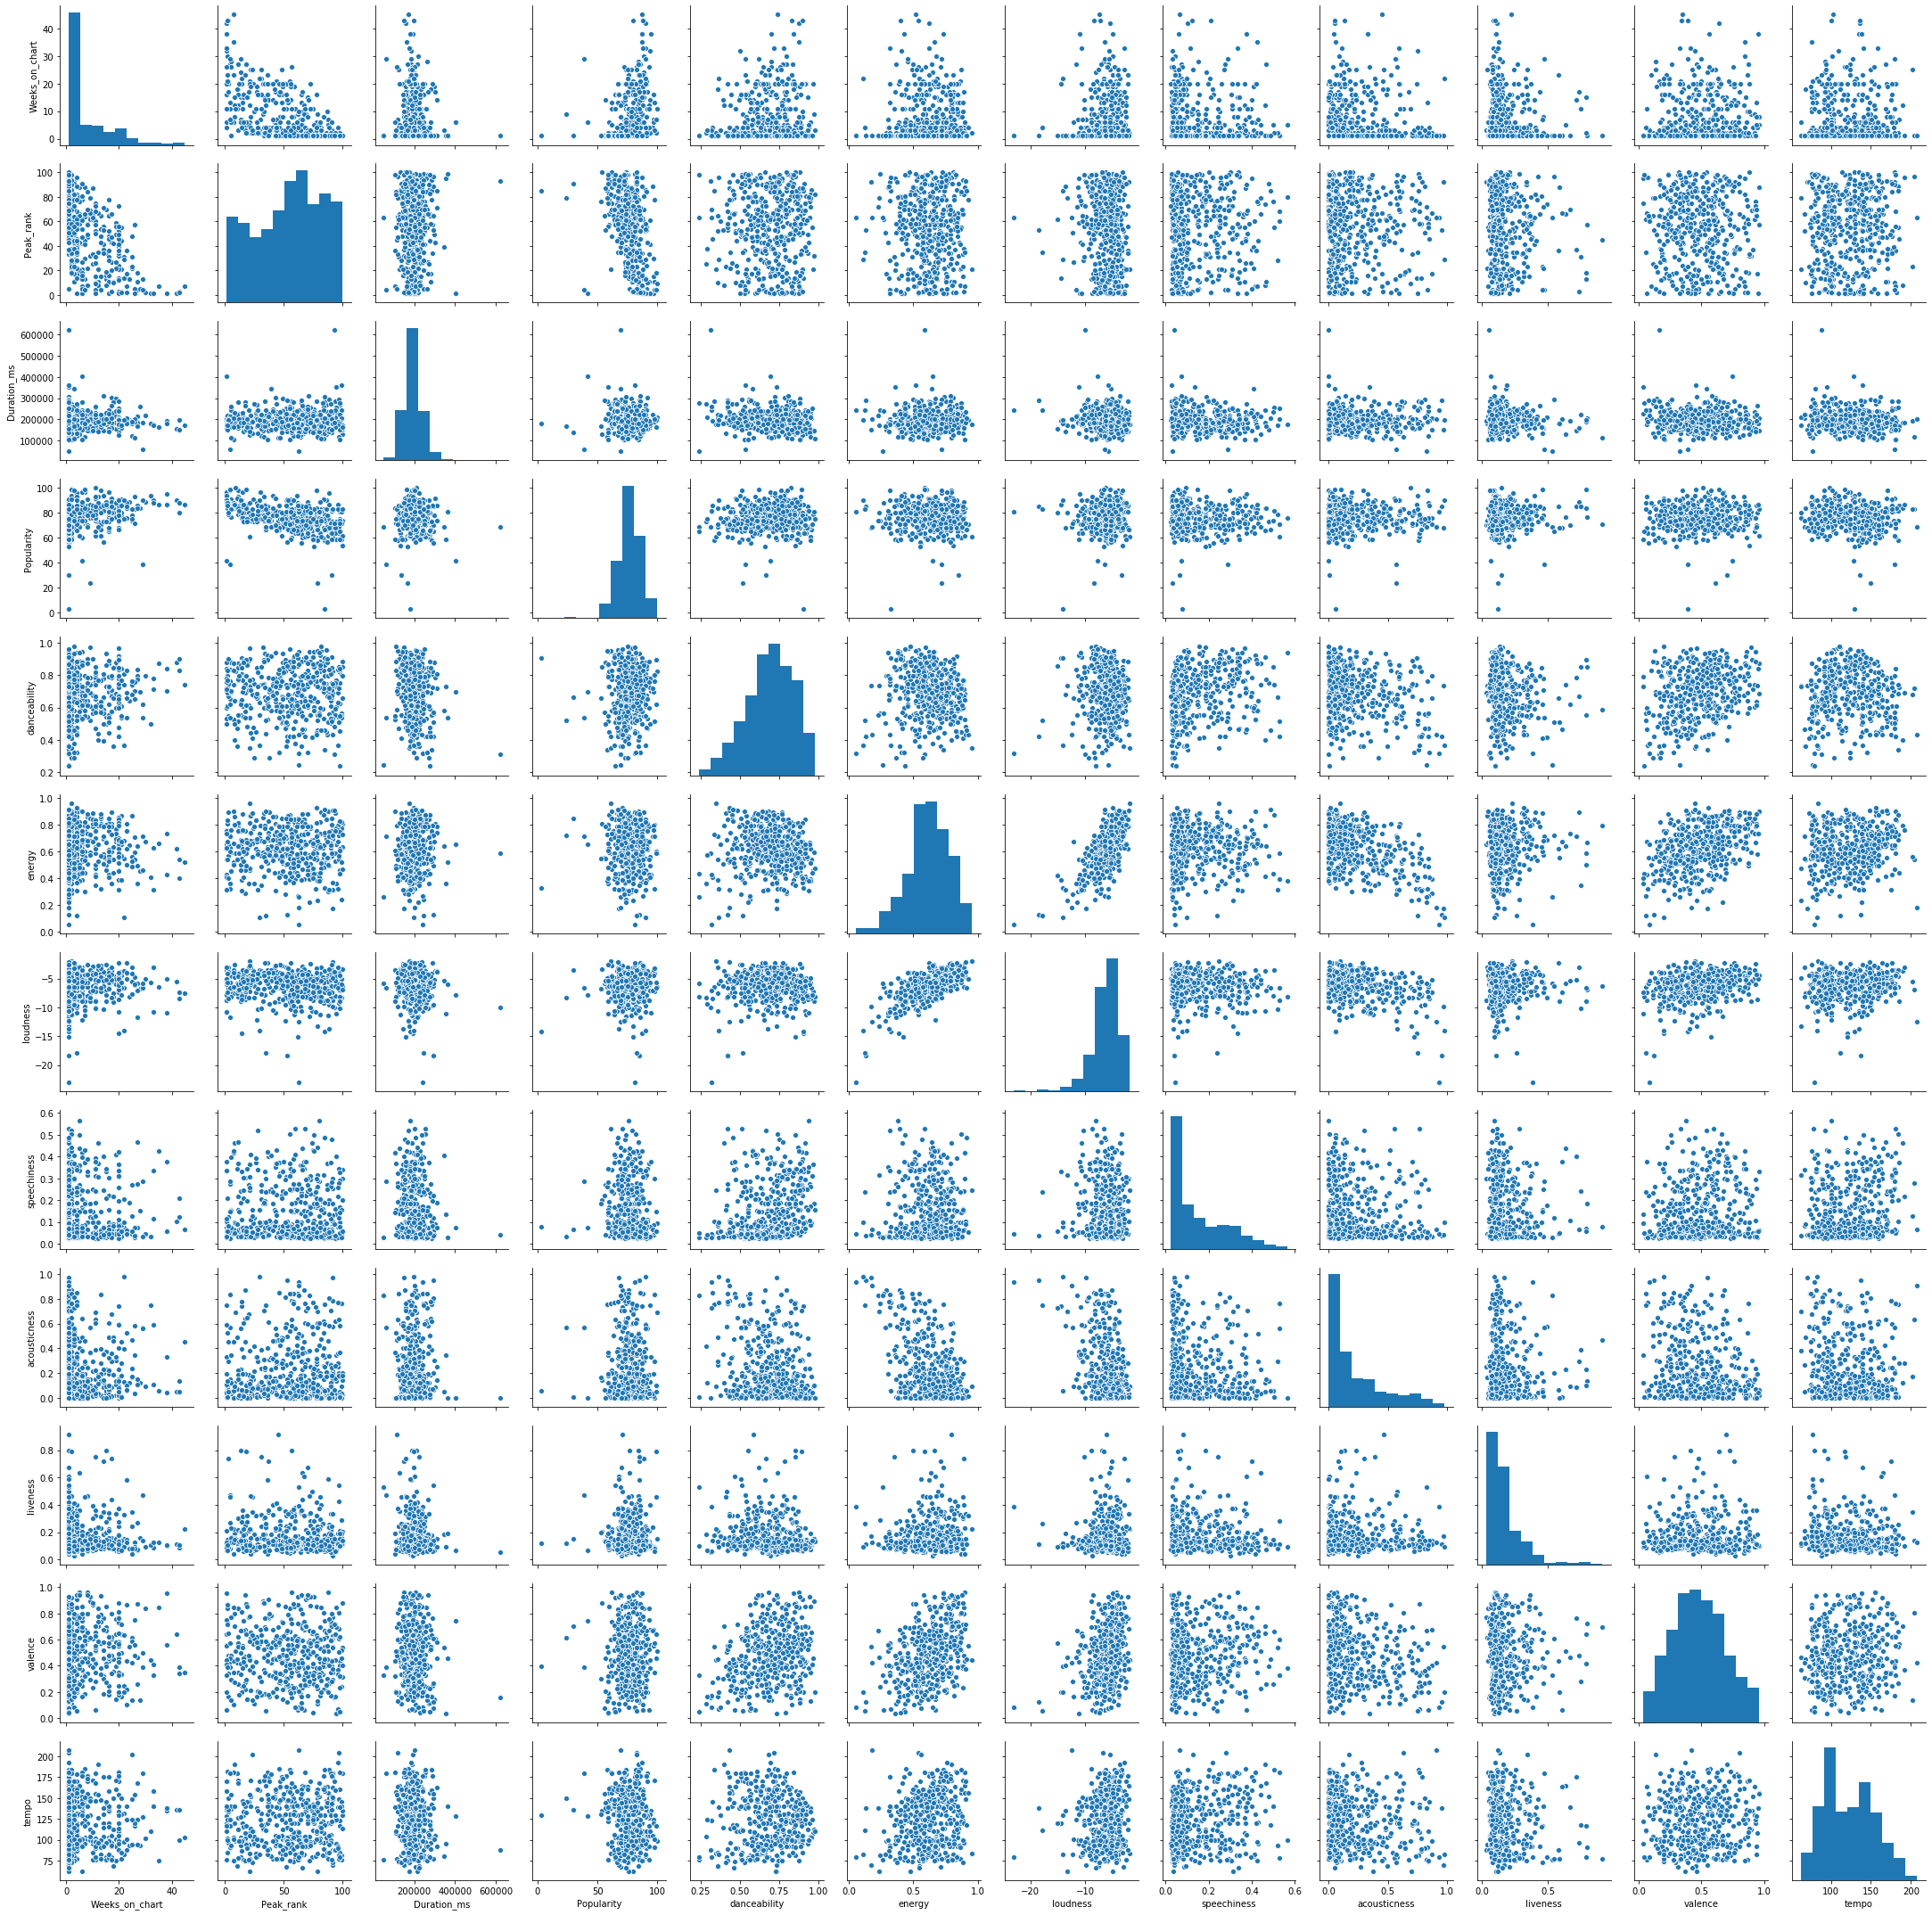

In [59]:
mask = released_2019[[
    'Weeks_on_chart', 'Peak_rank',
       'Release_date', 'Duration_ms', 'Popularity',
       'danceability', 'energy', 'loudness', 'speechiness',
       'acousticness', 'liveness', 'valence', 'tempo'
]]

sns.pairplot(mask)

In [60]:
released_2019.columns

Index(['Song_title', 'Artist', 'Weeks_on_chart', 'Peak_rank', 'Artist_list',
       'Artist_count', 'Collab', 'Artist_query', 'Song_and_artist',
       'Feature_dict', 'Release_date', 'Duration_ms', 'Id', 'Popularity',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'Weeks_from_release'],
      dtype='object')

Let's clear out a few of the outliers we can see a little more clearly now.

In [61]:
released_2019 = released_2019[(released_2019.Duration_ms < 600000)].reset_index(drop=True) #drops 1 entry

In [62]:
released_2019 = released_2019[(released_2019.Popularity > 50)].reset_index(drop=True) #drops 3 entries

In [63]:
released_2019 = released_2019[(released_2019.loudness > -17)].reset_index(drop=True) #drops 3 entries

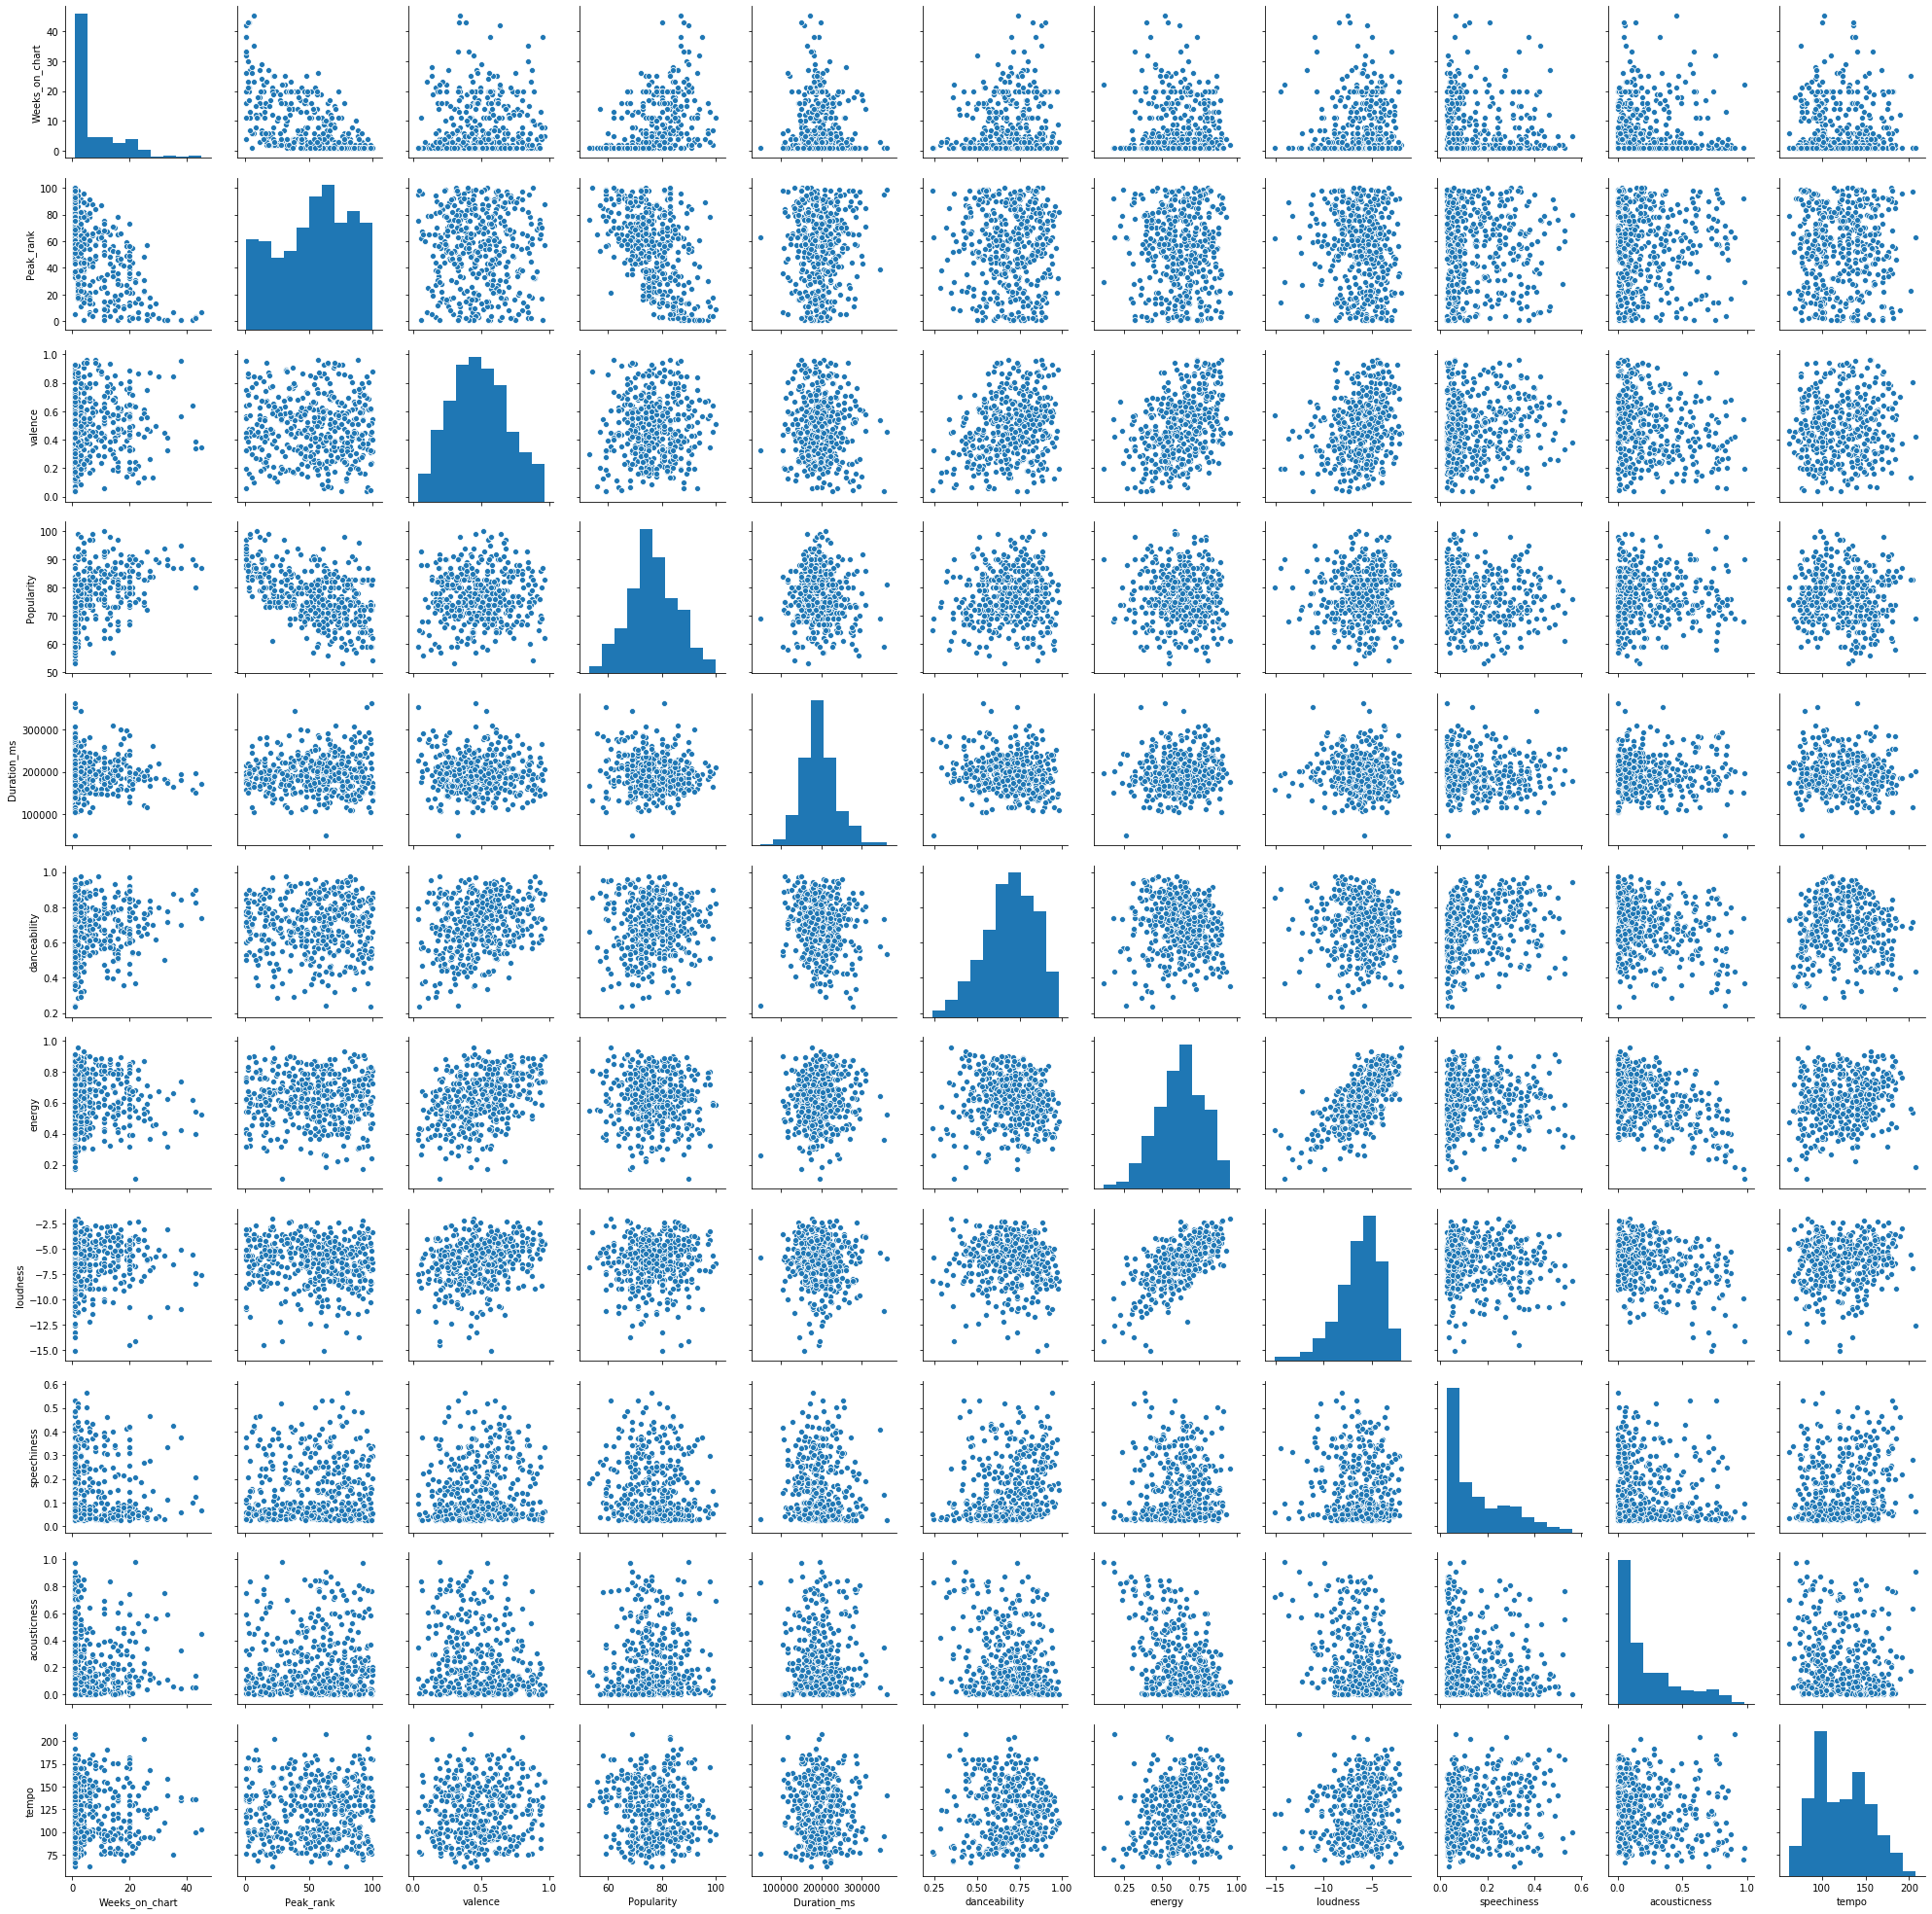

In [79]:
mask = released_2019[[
       'Weeks_on_chart', 'Peak_rank','Release_date',
       'valence', 'Popularity','Duration_ms', 'danceability', 'energy', 'loudness', 'speechiness',
       'acousticness', 'tempo']]

sns.pairplot(mask)

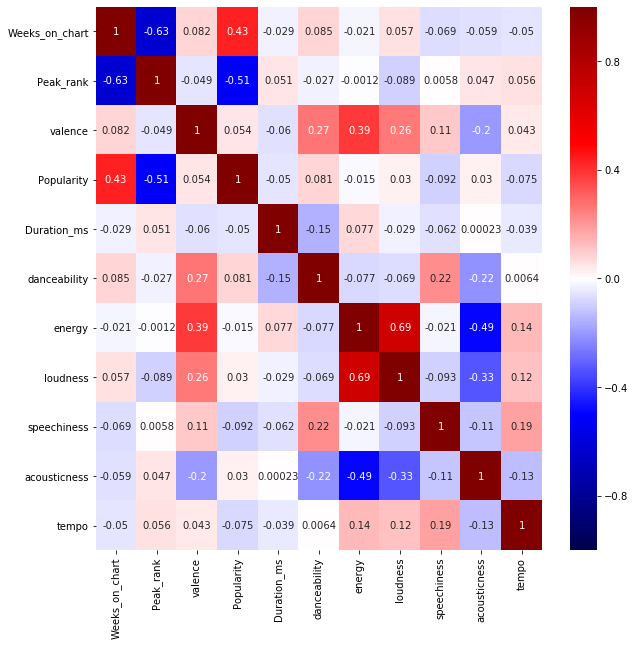

In [77]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(mask.corr(), cmap="seismic", annot=True, vmin=-1, vmax=1);

In [101]:
released_2019.to_csv('released_2019.csv')

GREAT!  Now put it down, walk away, and let's beging to analyze in another notebook.